# Vectorization vs Broadcasting in NumPy
**Goal:** Understand the difference between *vectorization* and *broadcasting* with code and visuals.


## 1. Vectorization
Vectorization means applying an operation to an entire array at once, instead of looping element by element.

In [3]:
import numpy as np
import time

# Example: Square numbers 0..9
x = np.arange(10)

# Loop method
start = time.time()
squares_loop = [val**2 for val in x]
loop_time = time.time() - start

# Vectorized method
start = time.time()
squares_vec = x**2
vec_time = time.time() - start

print('Squares (loop):', squares_loop)
print('Squares (vectorized):', squares_vec.tolist())
print(f'Loop time: {loop_time:.6f}s, Vectorized time: {vec_time:.6f}s')

Squares (loop): [np.int64(0), np.int64(1), np.int64(4), np.int64(9), np.int64(16), np.int64(25), np.int64(36), np.int64(49), np.int64(64), np.int64(81)]
Squares (vectorized): [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
Loop time: 0.000066s, Vectorized time: 0.000024s


## 2. Broadcasting
Broadcasting lets you combine arrays of different shapes without explicitly copying data.
For example, adding a row vector `(3,)` to a column vector `(2,1)` results in a `(2,3)` matrix.

In [ ]:
x = np.array([1,2,3])      # shape (3,)
y = np.array([[10],[20]])  # shape (2,1)
# The addition goes like this:
# x = [1,2,3]
# y = [[10],[20]]
# y, x expands to (2,3) and (3,2) respectively, and then the addition is performed element-wise
# result = [[1+10, 1+20, 1+30], [2+10, 2+20, 2+30], [3+10, 3+20, 3+30]]
# result = [[11, 21, 31], [12, 22, 32], [13, 23, 33]]
print('x shape:', x.shape)
print('y shape:', y.shape)
result = x + y
print('result shape:', result.shape)
print(result)

x shape: (3,)
y shape: (2, 1)
result shape: (2, 3)
[[11 12 13]
 [21 22 23]]


## 3. Broadcasting Expansion Visual
Let's visualize how broadcasting expands smaller arrays to match shapes.

Matplotlib is building the font cache; this may take a moment.


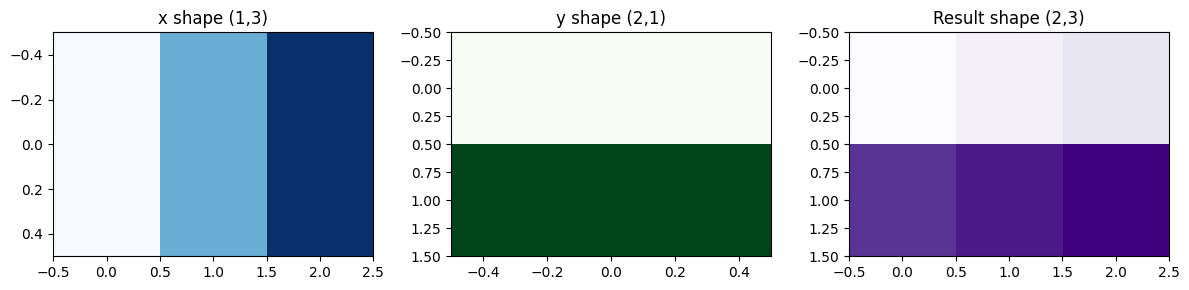

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(12,3))

# Original x
x = np.array([1,2,3])
ax[0].imshow(x.reshape(1,-1), cmap='Blues', aspect='auto')
ax[0].set_title('x shape (1,3)')

# Original y
y = np.array([[10],[20]])
ax[1].imshow(y, cmap='Greens', aspect='auto')
ax[1].set_title('y shape (2,1)')

# Broadcasted result
res = x + y
ax[2].imshow(res, cmap='Purples', aspect='auto')
ax[2].set_title('Result shape (2,3)')

plt.tight_layout()
plt.show()